<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/feature_engineering_linearmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Feature Engineering

This notebook provides an introduction to Feature Engineering, covering:

What is Feature Engineering? The process of creating and transforming features to improve model performance.

MODULE 1: INTRODUCTION TO FEATURE ENGINEERING

1. WHAT IS FEATURE ENGINEERING?
----------------------------------------

Feature Engineering is the process of:
- Creating new features from existing data
- Transforming raw data into features that better represent the underlying problem
- Improving model performance through domain knowledge and data manipulation

Key Benefits:
- Better model performance
- Reduced overfitting
- Improved interpretability
- Faster training times


2. CREATING A SYNTHETIC DATASET
----------------------------------------
Original Dataset Shape: (1000, 3)

First 5 rows:
         age        income  experience
0  39.967142  76963.918713   16.616785
1  33.617357  68240.525403   11.328320
2  41.476885  71775.037231   17.892046
3  50.230299  76995.614676   27.614376
4  32.658466  66149.582821    6.871237

Dataset Statistics:
               age         income   experience
count  1000.000000    1000.000000  1000.000000
mean     35.193321   65547.501744    13.204989
s

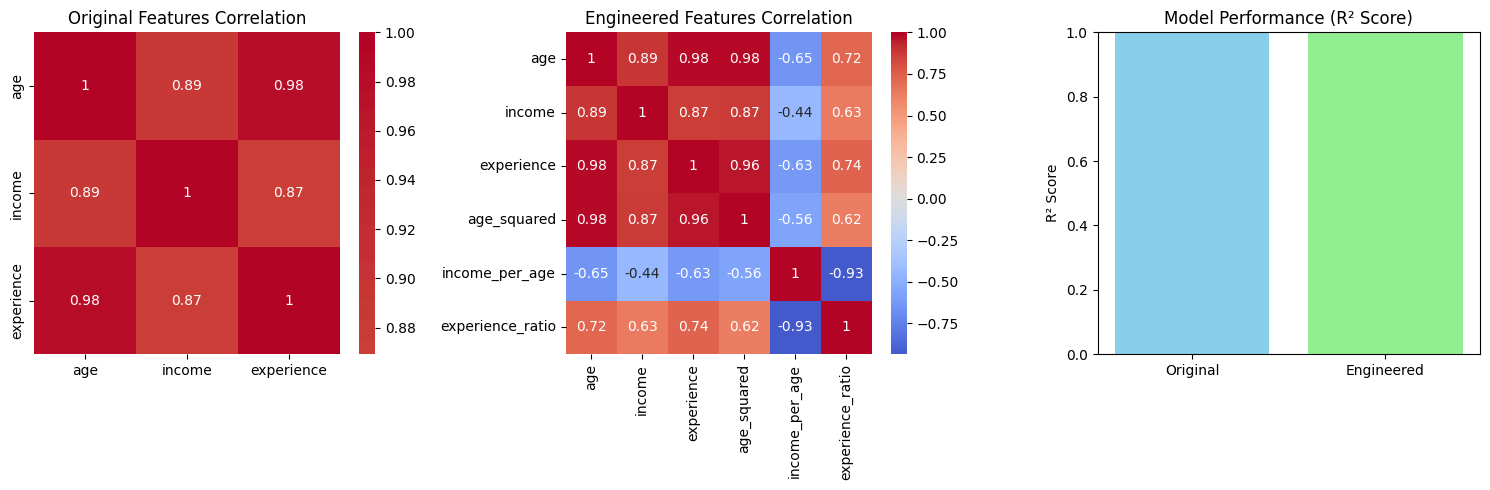


6. BUSINESS CONTEXT
----------------------------------------

Why Feature Engineering Matters in Business:

1. **Customer Segmentation**: 
   - Creating features like 'customer_lifetime_value' from purchase history
   - 'days_since_last_purchase' for churn prediction

2. **Financial Modeling**:
   - 'debt_to_income_ratio' from income and debt data
   - 'payment_history_score' from transaction patterns

3. **E-commerce**:
   - 'basket_size' from order data
   - 'seasonal_purchase_pattern' from timestamps

4. **Healthcare**:
   - 'risk_score' from multiple health indicators
   - 'treatment_effectiveness' from patient history


7. PRACTICAL EXERCISE
----------------------------------------

Exercise: Create a simple feature engineering pipeline

Given the following data:
- Customer age, income, and purchase frequency
- Create 3 new meaningful features
- Train a model to predict customer satisfaction
- Compare performance with and without engineered features

See 'exercise_1.py' for the c

In [2]:

"""
Module 1: Introduction to Feature Engineering
Level 7 Postgraduate Course

This module introduces the fundamental concepts of feature engineering and its importance
in machine learning model performance.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 60)
print("MODULE 1: INTRODUCTION TO FEATURE ENGINEERING")
print("=" * 60)

# 1. What is Feature Engineering?
print("\n1. WHAT IS FEATURE ENGINEERING?")
print("-" * 40)

print("""
Feature Engineering is the process of:
- Creating new features from existing data
- Transforming raw data into features that better represent the underlying problem
- Improving model performance through domain knowledge and data manipulation

Key Benefits:
- Better model performance
- Reduced overfitting
- Improved interpretability
- Faster training times
""")

# 2. Simple Example: Creating a Synthetic Dataset
print("\n2. CREATING A SYNTHETIC DATASET")
print("-" * 40)

# Generate synthetic data
n_samples = 1000
age = np.random.normal(35, 10, n_samples)
income = 30000 + age * 1000 + np.random.normal(0, 5000, n_samples)
experience = age - 22 + np.random.normal(0, 2, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'age': age,
    'income': income,
    'experience': experience
})

print("Original Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

# 3. Basic Feature Engineering Example
print("\n3. BASIC FEATURE ENGINEERING EXAMPLE")
print("-" * 40)

# Create new features
df['age_squared'] = df['age'] ** 2
df['income_per_age'] = df['income'] / df['age']
df['experience_ratio'] = df['experience'] / df['age']

print("After Feature Engineering - Dataset Shape:", df.shape)
print("\nNew features created:")
print("- age_squared: Age squared (captures non-linear relationships)")
print("- income_per_age: Income per year of age")
print("- experience_ratio: Experience as ratio of age")

print("\nUpdated Dataset (first 5 rows):")
print(df.head())

# 4. Impact on Model Performance
print("\n4. IMPACT ON MODEL PERFORMANCE")
print("-" * 40)

# Split data
X_original = df[['age', 'income', 'experience']]
X_engineered = df[['age', 'income', 'experience', 'age_squared', 'income_per_age', 'experience_ratio']]
y = df['income']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_original, y, test_size=0.2, random_state=42
)
X_train_eng, X_test_eng, y_train, y_test = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42
)

# Train models
model_original = LinearRegression()
model_engineered = LinearRegression()

model_original.fit(X_train_orig, y_train)
model_engineered.fit(X_train_eng, y_train)

# Predictions
y_pred_orig = model_original.predict(X_test_orig)
y_pred_eng = model_engineered.predict(X_test_eng)

# Evaluate
mse_orig = mean_squared_error(y_test, y_pred_orig)
mse_eng = mean_squared_error(y_test, y_pred_eng)
r2_orig = r2_score(y_test, y_pred_orig)
r2_eng = r2_score(y_test, y_pred_eng)

print("Model Performance Comparison:")
print(f"Original Features - MSE: {mse_orig:.2f}, R²: {r2_orig:.4f}")
print(f"Engineered Features - MSE: {mse_eng:.2f}, R²: {r2_eng:.4f}")
print(f"Improvement in R²: {r2_eng - r2_orig:.4f}")

# 5. Visualization
print("\n5. VISUALIZATION")
print("-" * 40)

plt.figure(figsize=(15, 5))

# Original features correlation
plt.subplot(1, 3, 1)
sns.heatmap(X_original.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Original Features Correlation')

# Engineered features correlation
plt.subplot(1, 3, 2)
sns.heatmap(X_engineered.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Engineered Features Correlation')

# Model performance comparison
plt.subplot(1, 3, 3)
models = ['Original', 'Engineered']
r2_scores = [r2_orig, r2_eng]
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen'])
plt.title('Model Performance (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# 6. Business Context
print("\n6. BUSINESS CONTEXT")
print("-" * 40)

print("""
Why Feature Engineering Matters in Business:

1. **Customer Segmentation**:
   - Creating features like 'customer_lifetime_value' from purchase history
   - 'days_since_last_purchase' for churn prediction

2. **Financial Modeling**:
   - 'debt_to_income_ratio' from income and debt data
   - 'payment_history_score' from transaction patterns

3. **E-commerce**:
   - 'basket_size' from order data
   - 'seasonal_purchase_pattern' from timestamps

4. **Healthcare**:
   - 'risk_score' from multiple health indicators
   - 'treatment_effectiveness' from patient history
""")

# 7. Exercise
print("\n7. PRACTICAL EXERCISE")
print("-" * 40)

print("""
Exercise: Create a simple feature engineering pipeline

Given the following data:
- Customer age, income, and purchase frequency
- Create 3 new meaningful features
- Train a model to predict customer satisfaction
- Compare performance with and without engineered features

See 'exercise_1.py' for the complete exercise.
""")

print("\n" + "=" * 60)
print("END OF MODULE 1")
print("=" * 60)
